In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
#from sklearn.model_selection import train_test_split
import datetime 
import datetime as dt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet
#import gensim
# nltk.download('stopwords')
#import re
#from gensim import models, corpora
import string

######################### Working directory #########################
import os
os.getcwd()
os.chdir("C:\\Users\\lzhga\\Documents\\Text Mining Project")

In [52]:
# For sentiment analysis, we use a bigger dataset containing reviews from other countries as well.
df = pd.read_csv("reviews_final_modelled.csv")

In [18]:
# # Preprocessing
# def remove_punctuation(text):
#     no_punct = "".join([c for c in text if c not in string.punctuation])
#     return no_punct

# stopwords = nltk.corpus.stopwords.words('english')
# newStopWords = ['work','working','company']
# stopwords.extend(newStopWords)
# operators = set(('no', 'not', 'never'))
# stopwords = set(stopwords) - operators

# def preprocess(sentence):
#     sentence = sentence.lower()
#     tokenizer = RegexpTokenizer(r'\w+')
#     tokens = tokenizer.tokenize(sentence)
#     filtered_words = [w for w in tokens if not w in stopwords]
#     return " ".join(filtered_words)

# # Lemmatizer
# w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
# lemmatizer = nltk.stem.WordNetLemmatizer()

# # Functions for lemmatizing with the appropriate POS-tag
# def get_wordnet_pos(word):
#     """Map POS tag to first character lemmatize() accepts"""
#     tag = nltk.pos_tag([word])[0][1][0].upper()
#     tag_dict = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}

#     return tag_dict.get(tag, wordnet.NOUN)

# def lemmatize_text(text):
#     return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)]

# df['cleaned_review'] = df['overall_review'].apply(remove_punctuation)
# df['cleaned_review'] = df['cleaned_review'].apply(preprocess)
# df['cleaned_review'] = df['cleaned_review'].apply(lemmatize_text)

In [53]:
df

,id,reviews.val.date,overall_review,Location,Title,overall_rating,careerOpportunities_rating,compBenefits_rating,cultureValues_rating,seniorManagement_rating,worklifeBalance_rating,overview.industry,header.employerName,cleaned_review,cleaned_review2,pred_topic
0,44024,2020-01-01,Good benefits and flexible hours Micromanageme...,Singapore (Singapore),Consultant,3.0,3.0,3.0,3.0,3.0,4.0,Government Agencies,GovTech,"['good', 'benefit', 'flexible', 'hour', 'micro...","['benefit', 'flexible', 'hour', 'micromanageme...",Benefits/Renumeration
1,44024,2020-01-01,"Good culture, advanced skillsets to learn from...",Singapore (Singapore),Intern,5.0,4.0,3.0,5.0,4.0,4.0,Government Agencies,GovTech,"['good', 'culture', 'advanced', 'skillsets', '...","['culture', 'advanced', 'skillsets', 'learn', ...",Management
2,44024,2020-01-01,- Clean and bright offices \r\n- Friendly &amp...,Singapore (Singapore),Intern,4.0,4.0,4.0,5.0,4.0,5.0,Government Agencies,GovTech,"['clean', 'bright', 'office', 'friendly', 'amp...","['clean', 'bright', 'office', 'friendly', 'amp...",Culture/Team
3,44024,2019-09-21,there are many training program No management ...,Singapore (Singapore),Senior Manager,1.0,2.0,4.0,1.0,1.0,3.0,Government Agencies,GovTech,"['many', 'training', 'program', 'no', 'managem...","['many', 'training', 'program', 'management', ...",Management
4,44054,2019-09-11,"no OT (work-life balance), just enough workloa...",Singapore (Singapore),IT Business Analyst,4.0,4.0,4.0,4.0,3.0,5.0,Healthcare Product Manufacturing,Essilor,"['no', 'ot', 'worklife', 'balance', 'enough', ...","['ot', 'worklife', 'balance', 'enough', 'workl...",Benefits/Renumeration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11737,116735,2019-06-10,"Extremely friendly people, the office team is ...",Singapore (Singapore),Full Stack Software Engineer,2.0,2.0,1.0,1.0,2.0,4.0,Unknown,Fen Associates,"['extremely', 'friendly', 'people', 'office', ...","['extremely', 'friendly', 'people', 'office', ...",Management
11738,116735,2019-04-19,Many nice people to start off! There is a lot ...,Singapore (Singapore),Operations,2.0,4.0,4.0,1.0,1.0,4.0,Unknown,Fen Associates,"['many', 'nice', 'people', 'start', 'lot', 'op...","['many', 'nice', 'people', 'start', 'lot', 'op...",Benefits/Renumeration
11739,116735,2019-04-15,TransferWise has really cool working culture. ...,Singapore (Singapore),Senior Software Engineer,4.0,5.0,4.0,5.0,4.0,5.0,Unknown,Fen Associates,"['transferwise', 'really', 'cool', 'culture', ...","['transferwise', 'really', 'cool', 'culture', ...",Management
11740,116758,2020-01-01,Great people with lot of knowledge Very much a...,Singapore (Singapore),Staff Software Engineer,4.0,5.0,4.0,5.0,4.0,4.0,IT Services,Devoteam,"['great', 'people', 'lot', 'knowledge', 'much'...","['people', 'lot', 'knowledge', 'much', 'agile'...",Benefits/Renumeration


In [55]:
df["rating_class"] = df["overall_rating"].map({1: "Negative", 2: "Negative", 3: "Neutral", 4: "Positive", 5:"Positive"})

In [74]:
df["Location"].value_counts()

Singapore (Singapore)    11742
Name: Location, dtype: int64

In [33]:
# df.to_csv("reviews_final_cleaned.csv", index=False)
# df = pd.read_csv("reviews_final_cleaned.csv")

In [78]:
# Train/Test Split
# from sklearn.model_selection import train_test_split
trainData, testData = train_test_split(df, test_size=0.2, random_state=0)

In [79]:
df['rating_class'].value_counts()

Positive    8064
Negative    2010
Neutral     1668
Name: rating_class, dtype: int64

In [80]:
trainData['rating_class'].value_counts()

Positive    6440
Negative    1611
Neutral     1342
Name: rating_class, dtype: int64

In [81]:
testData['rating_class'].value_counts()

Positive    1624
Negative     399
Neutral      326
Name: rating_class, dtype: int64

In [61]:
# Vectorizing the data
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating feature vectors
vectorizer = TfidfVectorizer(min_df =5, max_df = 0.8, sublinear_tf = True, use_idf = True)
train_vectors = vectorizer.fit_transform(trainData['cleaned_review'])
test_vectors = vectorizer.transform(testData['cleaned_review'])

In [62]:
train_vectors.shape

(9393, 3158)

In [63]:
test_vectors.shape

(2349, 3158)

In [64]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, trainData['rating_class'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(testData['rating_class'], prediction_linear, output_dict=True)
print('Positive: ', report['Positive'])
print('Neutral: ', report['Neutral'])
print('Negative: ', report['Negative'])

Training time: 11.959120s; Prediction time: 2.661644s
Positive:  {'precision': 0.9663663663663664, 'recall': 0.9907635467980296, 'f1-score': 0.9784128914563698, 'support': 1624}
Neutral:  {'precision': 0.9676258992805755, 'recall': 0.8251533742331288, 'f1-score': 0.8907284768211919, 'support': 326}
Negative:  {'precision': 0.9532019704433498, 'recall': 0.9699248120300752, 'f1-score': 0.9614906832298136, 'support': 399}


In [65]:
report = classification_report(testData['rating_class'], prediction_linear, output_dict=True)
print('Positive: ', report['Positive'])
print('Neutral: ', report['Neutral'])
print('Negative: ', report['Negative'])

Positive:  {'precision': 0.9663663663663664, 'recall': 0.9907635467980296, 'f1-score': 0.9784128914563698, 'support': 1624}
Neutral:  {'precision': 0.9676258992805755, 'recall': 0.8251533742331288, 'f1-score': 0.8907284768211919, 'support': 326}
Negative:  {'precision': 0.9532019704433498, 'recall': 0.9699248120300752, 'f1-score': 0.9614906832298136, 'support': 399}


In [82]:
testData.head()

,id,reviews.val.date,overall_review,Location,Title,overall_rating,careerOpportunities_rating,compBenefits_rating,cultureValues_rating,seniorManagement_rating,worklifeBalance_rating,overview.industry,header.employerName,cleaned_review,cleaned_review2,pred_topic,rating_class
9097,29622,2020-01-01,Compensation and benefits are decent Company d...,Singapore (Singapore),Senior Trader,3.0,3.0,3.0,3.0,1.0,2.0,Investment Banking & Asset Management,Citi,"['compensation', 'benefit', 'decent', 'directi...","['compensation', 'benefit', 'decent', 'directi...",Management,Neutral
8731,94746,2020-01-01,"Flexible, close team and superiers are down to...",Singapore (Singapore),IT Business Analyst,4.0,4.0,4.0,4.0,2.0,5.0,Computer Hardware & Software,ASML,"['flexible', 'close', 'team', 'superiers', 'ea...","['flexible', 'close', 'team', 'superiers', 'ea...",Management,Positive
5201,89017,2020-01-01,Good Company for experienced people Changing l...,Singapore (Singapore),Associate,4.0,2.0,4.0,3.0,3.0,1.0,Unknown,ENGIE ESPAÑA,"['good', 'experienced', 'people', 'change', 'l...","['experienced', 'people', 'change', 'leader', ...",Benefits/Renumeration,Positive
9655,16621,2020-01-01,"None in three long years. Bad pay, bad work cu...",Singapore (Singapore),Executive,1.0,1.0,1.0,1.0,1.0,1.0,"Cable, Internet & Telephone Providers",Singtel,"['none', 'three', 'long', 'year', 'bad', 'pay'...","['none', 'three', 'long', 'year', 'bad', 'pay'...",Culture/Team,Negative
5296,107369,2018-03-13,Comprehensive Health Coverage. Transportation ...,Singapore (Singapore),Engineer,4.0,0.0,4.0,0.0,0.0,0.0,Consumer Products Manufacturing,Bang & Olufsen,"['comprehensive', 'health', 'coverage', 'trans...","['comprehensive', 'health', 'coverage', 'trans...",Culture/Team,Positive


In [66]:
# Testing
review = "The company is horrible. no benefits. bad management"
review_vector = vectorizer.transform([review])
print(classifier_linear.predict(review_vector))

['Negative']


In [67]:
# Testing
review = "The company is great. people are friendly"
review_vector = vectorizer.transform([review])
print(classifier_linear.predict(review_vector))

['Positive']


In [83]:
testData["predict"] = prediction_linear

C:\Gabriel\Udemy\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
testData.head()

,id,reviews.val.date,overall_review,Location,Title,overall_rating,careerOpportunities_rating,compBenefits_rating,cultureValues_rating,seniorManagement_rating,worklifeBalance_rating,overview.industry,header.employerName,cleaned_review,cleaned_review2,pred_topic,rating_class,predict
9097,29622,2020-01-01,Compensation and benefits are decent Company d...,Singapore (Singapore),Senior Trader,3.0,3.0,3.0,3.0,1.0,2.0,Investment Banking & Asset Management,Citi,"['compensation', 'benefit', 'decent', 'directi...","['compensation', 'benefit', 'decent', 'directi...",Management,Neutral,Neutral
8731,94746,2020-01-01,"Flexible, close team and superiers are down to...",Singapore (Singapore),IT Business Analyst,4.0,4.0,4.0,4.0,2.0,5.0,Computer Hardware & Software,ASML,"['flexible', 'close', 'team', 'superiers', 'ea...","['flexible', 'close', 'team', 'superiers', 'ea...",Management,Positive,Positive
5201,89017,2020-01-01,Good Company for experienced people Changing l...,Singapore (Singapore),Associate,4.0,2.0,4.0,3.0,3.0,1.0,Unknown,ENGIE ESPAÑA,"['good', 'experienced', 'people', 'change', 'l...","['experienced', 'people', 'change', 'leader', ...",Benefits/Renumeration,Positive,Positive
9655,16621,2020-01-01,"None in three long years. Bad pay, bad work cu...",Singapore (Singapore),Executive,1.0,1.0,1.0,1.0,1.0,1.0,"Cable, Internet & Telephone Providers",Singtel,"['none', 'three', 'long', 'year', 'bad', 'pay'...","['none', 'three', 'long', 'year', 'bad', 'pay'...",Culture/Team,Negative,Negative
5296,107369,2018-03-13,Comprehensive Health Coverage. Transportation ...,Singapore (Singapore),Engineer,4.0,0.0,4.0,0.0,0.0,0.0,Consumer Products Manufacturing,Bang & Olufsen,"['comprehensive', 'health', 'coverage', 'trans...","['comprehensive', 'health', 'coverage', 'trans...",Culture/Team,Positive,Positive


In [86]:
# Can do slightly deeper analysis on those which predicted wrongly!
testData[["overall_review", "rating_class", "predict"]].loc[testData['rating_class'] != testData['predict']]

,overall_review,rating_class,predict
5493,Access to talent and clients Unannounced restr...,Neutral,Positive
9554,Learning embedded technology very well. there ...,Positive,Negative
11044,good Work Life Balance & Supervisor Branding i...,Neutral,Positive
4816,They have good employee policies in the market...,Neutral,Positive
7476,"People are generally nice, family-like environ...",Neutral,Positive
...,...,...,...
265,Colleagues are great. If you’re lucky to get t...,Negative,Positive
10095,Good working hours and work-life balance Too m...,Neutral,Negative
772,"working hours is good, work-life balance low b...",Neutral,Positive
8445,They have good employee policies in the market...,Neutral,Positive


[[ 387    2   10]
 [  11  269   46]
 [   8    7 1609]]
              precision    recall  f1-score   support

    Negative       0.95      0.97      0.96       399
     Neutral       0.97      0.83      0.89       326
    Positive       0.97      0.99      0.98      1624

    accuracy                           0.96      2349
   macro avg       0.96      0.93      0.94      2349
weighted avg       0.96      0.96      0.96      2349

MCC-Score: 0.9239067539351911


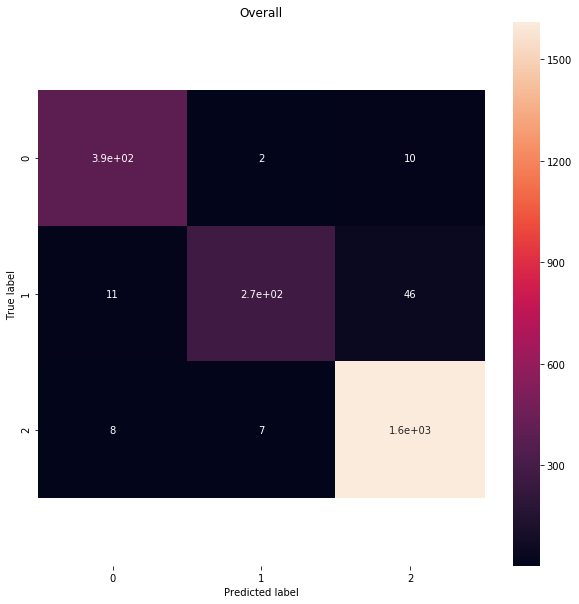

In [87]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef
print(confusion_matrix(testData['rating_class'], testData['predict'], labels=['Negative', 'Neutral', 'Positive']))
print(classification_report(testData['rating_class'], testData['predict']))
print("MCC-Score:", matthews_corrcoef(testData['rating_class'], testData['predict']))
# fix for mpl bug that cuts off top/bottom of seaborn viz
O_cm = confusion_matrix(testData['rating_class'], testData['predict'], labels=['Negative', 'Neutral', 'Positive'])
plt.figure(figsize=(10,10))
sns.heatmap(O_cm, annot=True)
# labels = ['Negative', 'Neutral', 'Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Overall')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [72]:
testData['predict'].value_counts()

Positive    1665
Negative     406
Neutral      278
Name: predict, dtype: int64

### Analysis on test data set

In [88]:
df['Location'].value_counts().head(10)

Singapore (Singapore)    11742
Name: Location, dtype: int64

In [123]:
# Unlike grouping employers into categories like what was done in topic modelling, I decided to look at the top represented industries instead due to sample size issues.

In [89]:
df['overview.industry'].value_counts().head(10)

Unknown                                    2460
IT Services                                1247
Computer Hardware & Software               1076
Internet                                    817
Staffing & Outsourcing                      566
Enterprise Software & Network Solutions     551
Investment Banking & Asset Management       480
Consulting                                  354
Banks & Building Societies                  331
Biotech & Pharmaceuticals                   288
Name: overview.industry, dtype: int64

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

[[ 62   0   1]
 [  2  27   3]
 [  1   3 151]]
              precision    recall  f1-score   support

    Negative       0.95      0.98      0.97        63
     Neutral       0.90      0.84      0.87        32
    Positive       0.97      0.97      0.97       155

    accuracy                           0.96       250
   macro avg       0.94      0.93      0.94       250
weighted avg       0.96      0.96      0.96       250

MCC-Score: 0.9253070478229751


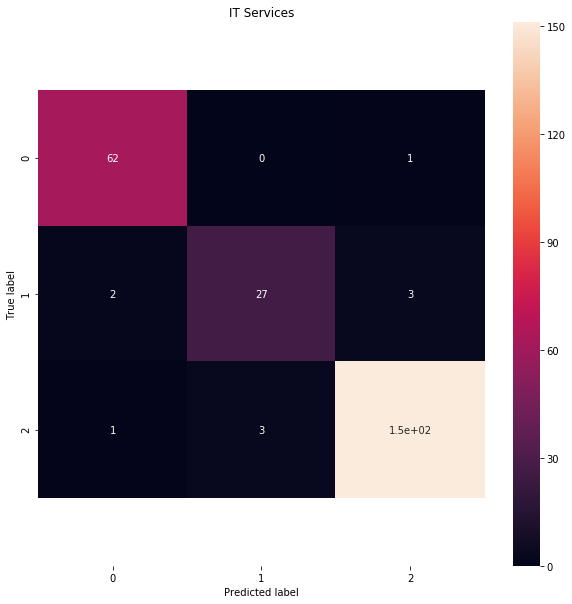

In [93]:
# Information Technology #
IT = testData[testData["overview.industry"]=="IT Services"]
IT_cm = confusion_matrix(IT['rating_class'], IT['predict'], labels=['Negative', 'Neutral', 'Positive'])
print(confusion_matrix(IT['rating_class'], IT['predict']))
print(classification_report(IT['rating_class'], IT['predict']))
print("MCC-Score:", matthews_corrcoef(IT['rating_class'], IT['predict']))
# fix for mpl bug that cuts off top/bottom of seaborn viz
plt.figure(figsize=(10,10))
sns.heatmap(IT_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('IT Services')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

[[ 20   0   2]
 [  3  26   3]
 [  1   0 136]]
              precision    recall  f1-score   support

    Negative       0.83      0.91      0.87        22
     Neutral       1.00      0.81      0.90        32
    Positive       0.96      0.99      0.98       137

    accuracy                           0.95       191
   macro avg       0.93      0.90      0.91       191
weighted avg       0.96      0.95      0.95       191

MCC-Score: 0.8931406144298799


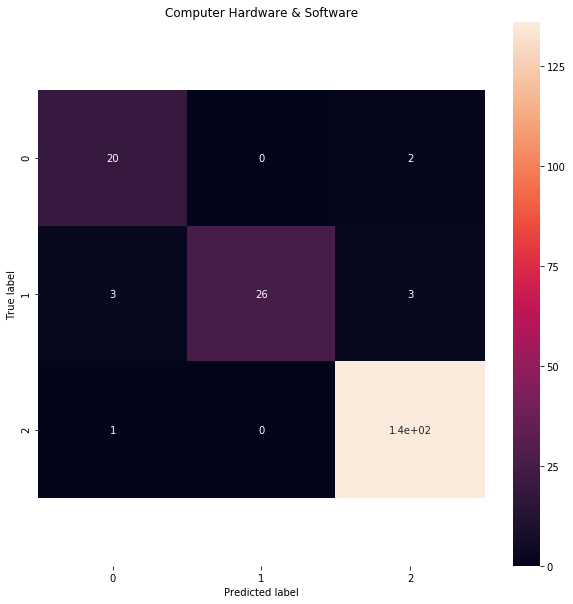

In [99]:
# Computer Hardware & Software #
CHS = testData[testData["overview.industry"]=="Computer Hardware & Software"]
CHS_cm = confusion_matrix(CHS['rating_class'], CHS['predict'], labels=['Negative', 'Neutral', 'Positive'])
print(confusion_matrix(CHS['rating_class'], CHS['predict']))
print(classification_report(CHS['rating_class'], CHS['predict']))
print("MCC-Score:", matthews_corrcoef(CHS['rating_class'], CHS['predict']))
# fix for mpl bug that cuts off top/bottom of seaborn viz
plt.figure(figsize=(10,10))
sns.heatmap(CHS_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Computer Hardware & Software')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

[[22  0  0]
 [ 0  4  3]
 [ 2  0 81]]
              precision    recall  f1-score   support

    Negative       0.92      1.00      0.96        22
     Neutral       1.00      0.57      0.73         7
    Positive       0.96      0.98      0.97        83

    accuracy                           0.96       112
   macro avg       0.96      0.85      0.88       112
weighted avg       0.96      0.96      0.95       112

MCC-Score: 0.8898251787968233


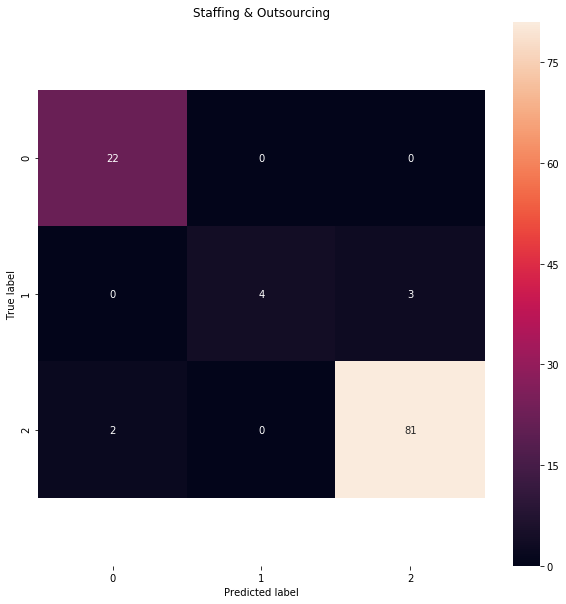

In [97]:
# Staffing & Outsourcing #
SAO = testData[testData["overview.industry"]=="Staffing & Outsourcing"]
SAO_cm = confusion_matrix(SAO['rating_class'], SAO['predict'], labels=['Negative', 'Neutral', 'Positive'])
print(confusion_matrix(SAO['rating_class'], SAO['predict']))
print(classification_report(SAO['rating_class'], SAO['predict']))
print("MCC-Score:", matthews_corrcoef(SAO['rating_class'], SAO['predict']))
# fix for mpl bug that cuts off top/bottom of seaborn viz
plt.figure(figsize=(10,10))
sns.heatmap(SAO_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Staffing & Outsourcing')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [304]:
# Incorporating Topic Modelling #

In [96]:
testData['pred_topic'].value_counts()

Management               968
Benefits/Renumeration    758
Culture/Team             623
Name: pred_topic, dtype: int64

[[106   1   3]
 [  3 104  24]
 [  3   2 722]]
              precision    recall  f1-score   support

    Negative       0.95      0.96      0.95       110
     Neutral       0.97      0.79      0.87       131
    Positive       0.96      0.99      0.98       727

    accuracy                           0.96       968
   macro avg       0.96      0.92      0.94       968
weighted avg       0.96      0.96      0.96       968

MCC-Score: 0.90677374766905


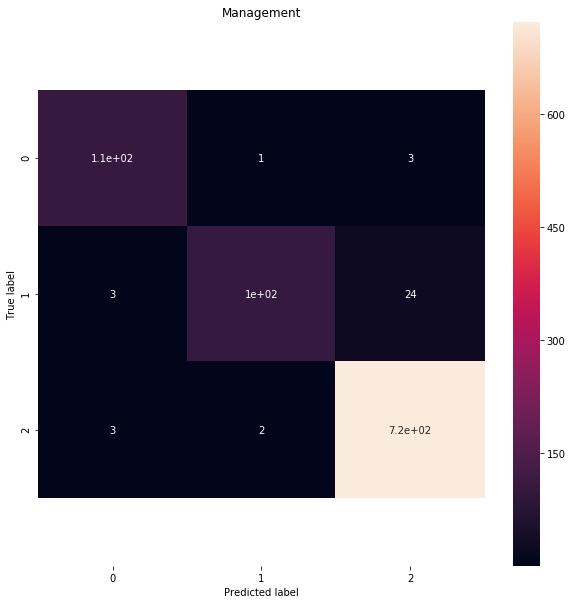

In [101]:
# Management #
MNG = testData[testData["pred_topic"]=="Management"]
MNG_cm = confusion_matrix(MNG['rating_class'], MNG['predict'], labels=['Negative', 'Neutral', 'Positive'])
print(confusion_matrix(MNG['rating_class'], MNG['predict']))
print(classification_report(MNG['rating_class'], MNG['predict']))
print("MCC-Score:", matthews_corrcoef(MNG['rating_class'], MNG['predict']))
# fix for mpl bug that cuts off top/bottom of seaborn viz
plt.figure(figsize=(10,10))
sns.heatmap(MNG_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Management')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

[[129   0   4]
 [  5 125  16]
 [  4   2 473]]
              precision    recall  f1-score   support

    Negative       0.93      0.97      0.95       133
     Neutral       0.98      0.86      0.92       146
    Positive       0.96      0.99      0.97       479

    accuracy                           0.96       758
   macro avg       0.96      0.94      0.95       758
weighted avg       0.96      0.96      0.96       758

MCC-Score: 0.9230807364137045


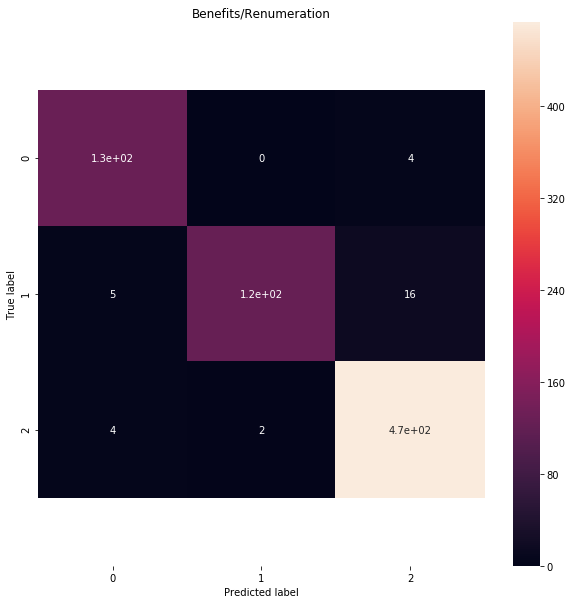

In [103]:
# Salary/Benefits #
SB = testData[testData["pred_topic"]=="Benefits/Renumeration"]
SB_cm = confusion_matrix(SB['rating_class'], SB['predict'], labels=['Negative', 'Neutral', 'Positive'])
print(confusion_matrix(SB['rating_class'], SB['predict']))
print(classification_report(SB['rating_class'], SB['predict']))
print("MCC-Score:", matthews_corrcoef(SB['rating_class'], SB['predict']))
# fix for mpl bug that cuts off top/bottom of seaborn viz
plt.figure(figsize=(10,10))
sns.heatmap(SB_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Benefits/Renumeration')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

[[152   1   3]
 [  3  40   6]
 [  1   3 414]]
              precision    recall  f1-score   support

    Negative       0.97      0.97      0.97       156
     Neutral       0.91      0.82      0.86        49
    Positive       0.98      0.99      0.98       418

    accuracy                           0.97       623
   macro avg       0.95      0.93      0.94       623
weighted avg       0.97      0.97      0.97       623

MCC-Score: 0.9428723315831232


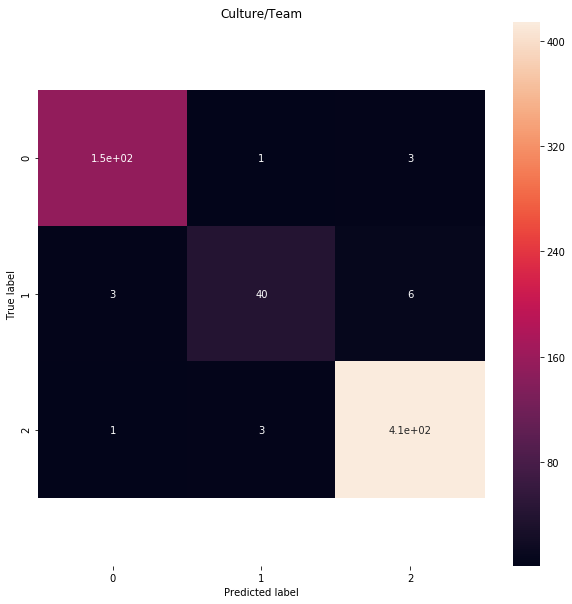

In [105]:
# Culture/Team #
CT = testData[testData["pred_topic"]=="Culture/Team"]
CT_cm = confusion_matrix(CT['rating_class'], CT['predict'], labels=['Negative', 'Neutral', 'Positive'])
print(confusion_matrix(CT['rating_class'], CT['predict']))
print(classification_report(CT['rating_class'], CT['predict']))
print("MCC-Score:", matthews_corrcoef(CT['rating_class'], CT['predict']))
# fix for mpl bug that cuts off top/bottom of seaborn viz
plt.figure(figsize=(10,10))
sns.heatmap(CT_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Culture/Team')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()